# Machine Learning: Intermediate report

+ Sho Shimadu (15B16510)

Prepare an environment for running Python codes on Jupyter notebook. The most easiest way is to use [Google Colaboratory](https://colab.research.google.com/).

Write codes for the following three (and one optional) problems, and submit the notebook (`.ipynb`) as well as its HTML conversion (`.html`). *We do not accept a report in other formats (e.g., Word, PDF)*. Write a code at the specified cell in the notebook. One can add more cells if necessary.

These are the links to the sample codes used in the lecture:

+ [Binary classification](https://github.com/chokkan/deeplearningclass/blob/master/mlp_binary.ipynb)
+ [MNIST](https://github.com/chokkan/deeplearningclass/blob/master/mnist.ipynb)

## 1. Multi-class classification on MNIST

Train a model on the training set of MNIST, and report the accuracy of the model on the test set. One can use the same code shown in the lecture. Write a code here and show the output.

In [79]:
import matplotlib.pyplot as plt
import pylab

import numpy as np

import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable

from torch.utils.data import DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms

## 条件設定

In [3]:
# 学習
epochs = 10
batch_size = 100

## データセットの生成

In [9]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

## 学習用・評価用関数

In [10]:
def train(train_loader):
    model.train()
    running_loss = 0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        running_loss += loss.data[0]

        loss.backward()
        optimizer.step()

    train_loss = running_loss / len(train_loader)
    
    return train_loss


def valid(test_loader):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0
    for batch_idx, (images, labels) in enumerate(test_loader):
        images = Variable(images, volatile=True)
        labels = Variable(labels, volatile=True)

        outputs = model(images)

        loss = criterion(outputs, labels)
        running_loss += loss.data[0]

        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels.data).sum()
        total += labels.size(0)

    val_loss = running_loss / len(test_loader)
    val_acc = correct / total
    
    return val_loss, val_acc

## Neural Network

In [62]:
class NN(nn.Module):
    def __init__(self, in_, hidden_, out_):
        super(NN, self).__init__()
        self.hx = nn.Linear(in_, hidden_)
        self.hy = nn.Linear(hidden_, out_)
 
    def forward(self, x):
        out = x.view(-1, 28 * 28)
        out = F.relu(self.hx(out))
        out = F.softmax(self.hy(out), dim=1)
        return out

In [63]:
model = NN(28*28, 20, 10)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [64]:
for epoch in range(epochs):
    loss = train(train_loader)
    val_loss, val_acc = valid(test_loader)

    print('epoch %d, loss: %.4f val_loss: %.4f val_acc: %.4f'
          % (epoch, loss, val_loss, val_acc))

epoch 0, loss: 1.7067 val_loss: 1.5760 val_acc: 0.9048
epoch 1, loss: 1.5649 val_loss: 1.5513 val_acc: 0.9232
epoch 2, loss: 1.5506 val_loss: 1.5441 val_acc: 0.9256
epoch 3, loss: 1.5429 val_loss: 1.5379 val_acc: 0.9310
epoch 4, loss: 1.5369 val_loss: 1.5366 val_acc: 0.9302
epoch 5, loss: 1.5320 val_loss: 1.5309 val_acc: 0.9359
epoch 6, loss: 1.5282 val_loss: 1.5282 val_acc: 0.9388
epoch 7, loss: 1.5247 val_loss: 1.5268 val_acc: 0.9390
epoch 8, loss: 1.5220 val_loss: 1.5248 val_acc: 0.9399
epoch 9, loss: 1.5193 val_loss: 1.5227 val_acc: 0.9418


## 2. Confusion matrix

Show a confusion matrix of the predictions of the model on the test set. This is an example of a confusion matrix.

![example](example-confusion-matrix.png)

Write a code here and show the confusion matrix.

In [65]:
def confusion_matrix(test_loader):
    model.eval()
    mat = np.zeros((10, 10), dtype=int)
    running_loss = 0
    correct = 0
    total = 0
    for batch_idx, (images, labels) in enumerate(test_loader):
        images = Variable(images, volatile=True)
        labels = Variable(labels, volatile=True)

        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)
        for pre, lab in zip(predicted, labels):
            mat[int(pre), int(lab)] += 1

    return mat

In [66]:
confusion_matrix(test_loader)

array([[ 960,    0,    8,    0,    1,    8,    7,    2,    3,   10],
       [   0, 1108,    1,    0,    3,    1,    3,    5,    4,    5],
       [   0,    7,  945,   18,    4,    2,    4,   24,    7,    1],
       [   2,    3,   16,  942,    0,   21,    2,    5,   20,   17],
       [   0,    0,   10,    0,  939,    5,    3,    5,    9,   31],
       [   3,    1,    5,   19,    0,  817,   10,    1,   16,    7],
       [  10,    3,    8,    2,    8,   13,  926,    0,    9,    1],
       [   3,    2,   13,    8,    2,    1,    1,  966,    9,    7],
       [   2,   11,   24,   14,    5,   18,    2,    4,  892,    7],
       [   0,    0,    2,    7,   20,    6,    0,   16,    5,  923]])

## 3. Top-3 confusing examples

Show the top three images where the model misrecognized their digits with strong confidences. More specifically, let $y_n$ and $\hat{y}_n$ the true and predicted, respectively, digits of the image $x_n$. We want to find three images with high $P(\hat{y}_n | x_n)$ when $y_n \neq \hat{y}_n$.

Please show $y_n$, $P(y_n | x_n)$, $\hat{y}_n$, and $P(\hat{y}_n | x_n)$. This is an example of an output for an image (you need this kind of outputs for top-three images).

![example](example-confusing-sample.png)

Write a code here and show the output.

In [194]:
def confusion_example(test_loader, n=3):
    model.eval()

    la = np.array([], int)
    out = np.array([], float)
    pre = np.array([], int)
    pro = np.array([], float)
    im = np.array([])

    for batch_idx, (images, labels) in enumerate(test_loader):
        images_ = Variable(images, volatile=True)

        outputs = model(images_)
        prob, predicted = torch.max(outputs.data, 1)
        
        miss = np.where(predicted != labels)
        if len(miss[0]) != 0:
            la = np.append(la, labels[miss])
            out = np.append(out, outputs[miss])
            pre = np.append(pre, predicted[miss])
            pro = np.append(pro, prob[miss])
            im = np.append(im, images[miss])
            
    max_idx = np.argpartition(-pro, n)[:n]
    im = im.reshape(-1, 28, 28)
    for idx in max_idx:
        print("True digit : {}({}) ; prediction : {}({})".format(la[idx], float(out[idx]), pre[idx], pro[idx]))
        image = im[idx]
        plt.imshow(image)
        plt.colorbar()
        plt.show()

True digit : 2(3.7660656744264998e-06) ; prediction : 4(1.0)


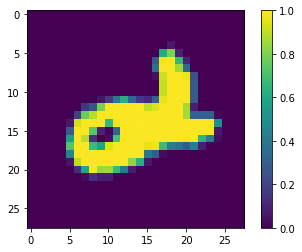

True digit : 2(1.1081264261747492e-07) ; prediction : 7(0.9999999403953552)


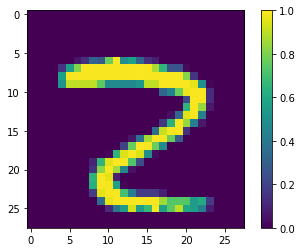

True digit : 7(1.9362368492933414e-14) ; prediction : 2(0.9999998211860657)


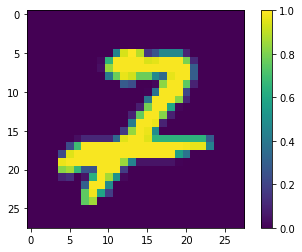

In [195]:
confusion_example(test_loader)

## 4. Sample codes in other DL frameworks

(Advanced; optional) Implement one or more sample code(s) with a different deep learning framework (e.g., Chainer, TensorFlow, DyNet) corresponding to the slides 60-66 in binary classification. *When subitting an answer to this problem, please agree that some of the submitted codes will be distributed on the Web site to improve this lecture.*

In [45]:
import keras
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np

In [59]:
x = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([[1], [1], [1], [0]])

model = keras.Sequential()
model.add(Dense(1, activation="sigmoid", input_shape=(3,)))
optimizer = SGD(lr=0.5)
model.compile(optimizer=optimizer, loss="binary_crossentropy")

model.fit(x, y, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 55ms/step - loss: 0.7710
Epoch 2/100
4/4 [==============================] - 0s 249us/step - loss: 0.6461
Epoch 3/100
4/4 [==============================] - 0s 176us/step - loss: 0.5806
Epoch 4/100
4/4 [==============================] - 0s 190us/step - loss: 0.5443
Epoch 5/100
4/4 [==============================] - 0s 195us/step - loss: 0.5219
Epoch 6/100
4/4 [==============================] - 0s 185us/step - loss: 0.5060
Epoch 7/100
4/4 [==============================] - 0s 189us/step - loss: 0.4935
Epoch 8/100
4/4 [==============================] - 0s 174us/step - loss: 0.4829
Epoch 9/100
4/4 [==============================] - 0s 167us/step - loss: 0.4732
Epoch 10/100
4/4 [==============================] - 0s 170us/step - loss: 0.4643
Epoch 11/100
4/4 [==============================] - 0s 194us/step - loss: 0.4558
Epoch 12/100
4/4 [==============================] - 0s 200us/step - loss: 0.4478
Epoch 13/100
4/4 [====================

In [60]:
pred = model.predict(np.array([[0, 0, 1]]))
print("predict={}, prob={}".format(1 if pred > 0.5 else 0, pred))

pred = model.predict(np.array([[1, 0, 1]]))
print("predict={}, prob={}".format(1 if pred > 0.5 else 0, pred))

pred = model.predict(np.array([[0, 1, 1]]))
print("predict={}, prob={}".format(1 if pred > 0.5 else 0, pred))

pred = model.predict(np.array([[1, 1, 1]]))
print("predict={}, prob={}".format(1 if pred > 0.5 else 0, pred))

predict=1, prob=[[0.98266166]]
predict=1, prob=[[0.82348186]]
predict=1, prob=[[0.82889146]]
predict=0, prob=[[0.28507355]]
